# Stock Analysis Mini Project 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Portfolio of Bank Stocks**

In [4]:
# Bank of America
BAC = pd.read_csv("BAC.csv",parse_dates=True,index_col='Date')

# JP Morgan
JPM = pd.read_csv("JPM.csv",parse_dates=True,index_col='Date')

# CitiGroup
C = pd.read_csv('C.csv',parse_dates=True,index_col='Date')

# HSBC
HSBC = pd.read_csv("HSBC.csv",parse_dates=True,index_col='Date')

#Royal Bank of Canada
RY = pd.read_csv("RY.csv",parse_dates=True,index_col='Date')

In [5]:
#Portfolios
portfolio_list = [BAC,JPM,C,HSBC,RY]
portfolio_dict = {'BAC':BAC,'JPM':JPM,'C':C,'HSBC':HSBC,'RY':RY}

**A line plot showing the Adj. Close prices over the last 5 years for all the stocks in the portfolio**

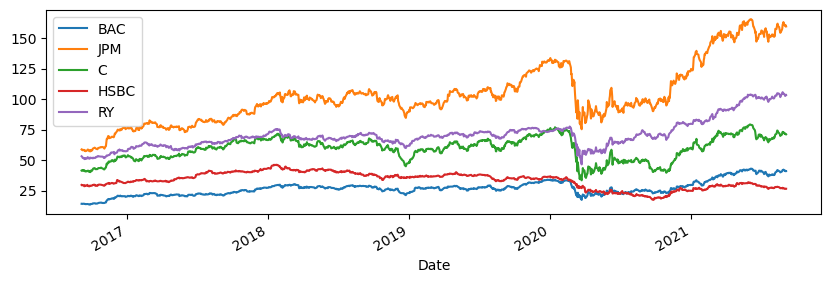

In [6]:
plt.figure(figsize=(10, 3),dpi=100)

BAC["Adj Close"].plot(label="BAC")
JPM["Adj Close"].plot(label="JPM")
C["Adj Close"].plot(label="C")
HSBC["Adj Close"].plot(label="HSBC")
RY["Adj Close"].plot(label="RY")

plt.legend()

**A function that takes in the Adj. Close price series, and then can calculate the stocks percent rise or decline from any set of given dates**

In [8]:
def perc_calc(ticker,start_date,end_date):
    per = 100 * ((ticker['Adj Close'][end_date] - ticker['Adj Close'][start_date]) / ticker['Adj Close'][start_date])
    fnl_per = float(round(per,2))
    print(f'Percent Change: {fnl_per}%')

In [9]:
perc_calc(BAC,'2016-09-06','2021-09-03')

Percent Change: 187.74%


**A histogram of the daily returns for each stock in the portfolio**

In [10]:
BAC_return = pd.read_csv("BAC.csv",parse_dates=True,index_col='Date')['Adj Close']
JPM_return = pd.read_csv("JPM.csv",parse_dates=True,index_col='Date')['Adj Close']
C_return = pd.read_csv('C.csv',parse_dates=True,index_col='Date')['Adj Close']
HSBC_return = pd.read_csv("HSBC.csv",parse_dates=True,index_col='Date')['Adj Close']
RY_return = pd.read_csv("RY.csv",parse_dates=True,index_col='Date')['Adj Close']

In [11]:
retail = pd.concat([BAC_return,JPM_return,C_return,HSBC_return,RY_return],axis=1)
retail.columns = ['BAC','JPM','C','HSBC','RY']

In [12]:
retail_returns = retail.pct_change(1)
retail_returns

,BAC,JPM,C,HSBC,RY
Date,,,,,
2016-09-06,NaN,NaN,NaN,NaN,NaN
2016-09-07,-0.005070,-0.004152,0.004018,-0.012523,-0.006456
2016-09-08,0.010191,0.001340,0.006529,0.008983,-0.006181
2016-09-09,-0.007566,-0.008922,-0.012974,-0.000262,-0.013873
2016-09-12,0.010165,0.006151,0.013144,-0.004714,-0.000809
...,...,...,...,...,...
2021-08-30,-0.019534,-0.016007,-0.018085,-0.017311,-0.006591
2021-08-31,0.002160,-0.003054,0.003349,-0.008995,-0.011923
2021-09-01,-0.013413,-0.001438,-0.008344,0.008699,-0.001654


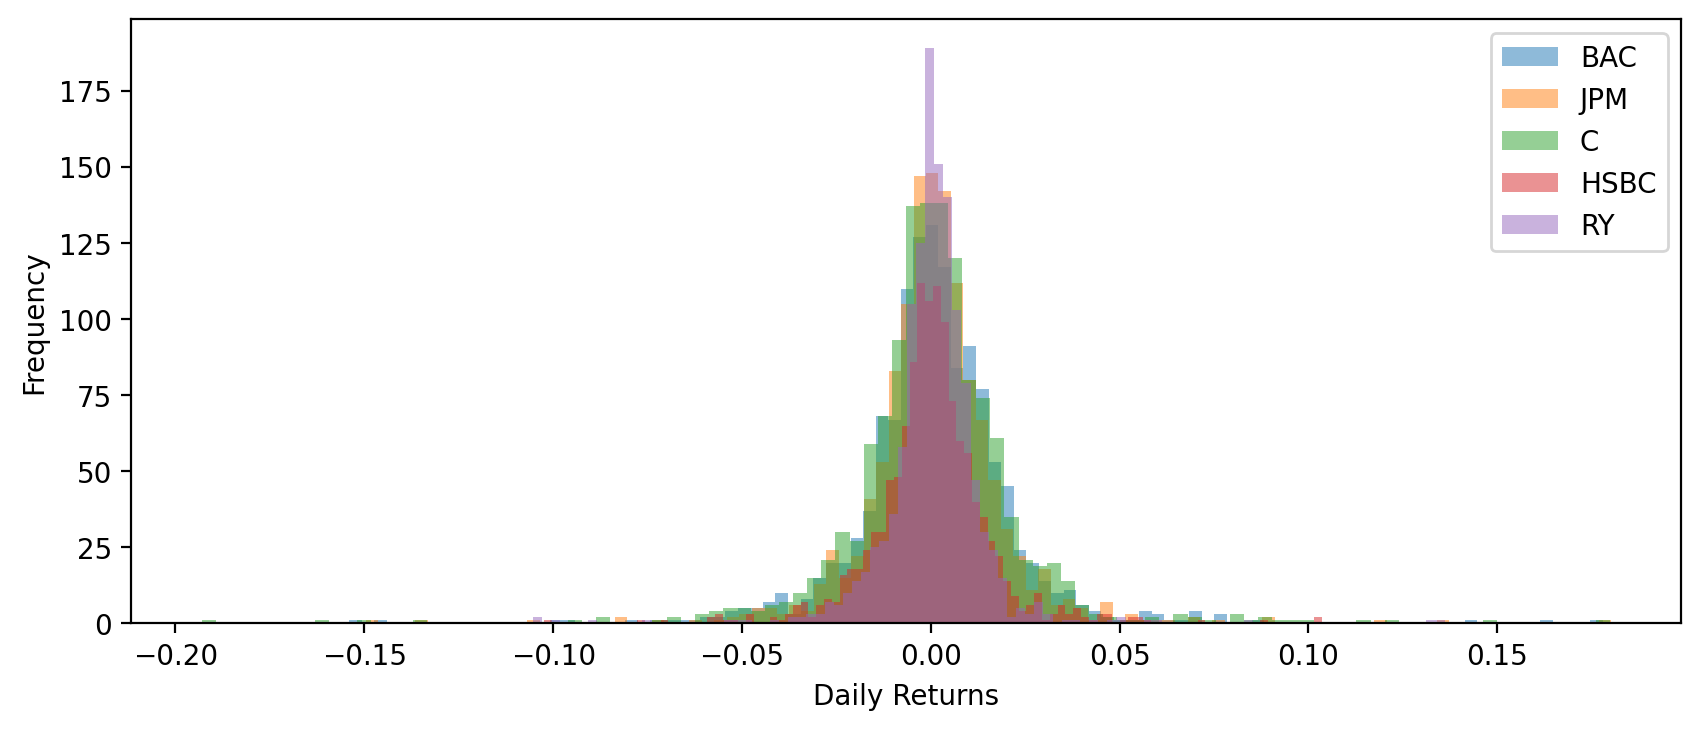

In [13]:
plt.figure(dpi=200,figsize=(10,4))
retail_returns['BAC'].plot(kind='hist',bins=100, alpha=0.5)
retail_returns['JPM'].plot(kind='hist',bins=100, alpha=0.5)
retail_returns['C'].plot(kind='hist',bins=100, alpha=0.5)
retail_returns['HSBC'].plot(kind='hist',bins=100, alpha=0.5)
retail_returns['RY'].plot(kind='hist',bins=100, alpha=0.5)

plt.xlabel('Daily Returns')
plt.legend()

**A plot that shows the value of $10,000 BAC at the start of the time series and what value it would have in dollars throughout the rest of the time period**

In [14]:
#Approximately 701 shares
new_BAC = BAC['Adj Close']*701
new_BAC

Date
2016-09-06    10000.850148
2016-09-07     9950.148220
2016-09-08    10051.549973
2016-09-09     9975.499184
2016-09-12    10076.900937
                  ...     
2021-08-30    29054.768301
2021-08-31    29117.537944
2021-09-01    28726.980000
2021-09-02    28755.020000
2021-09-03    28776.049299
Name: Adj Close, Length: 1259, dtype: float64

<AxesSubplot:xlabel='Date', ylabel='Dollar Value of BAC Stock'>

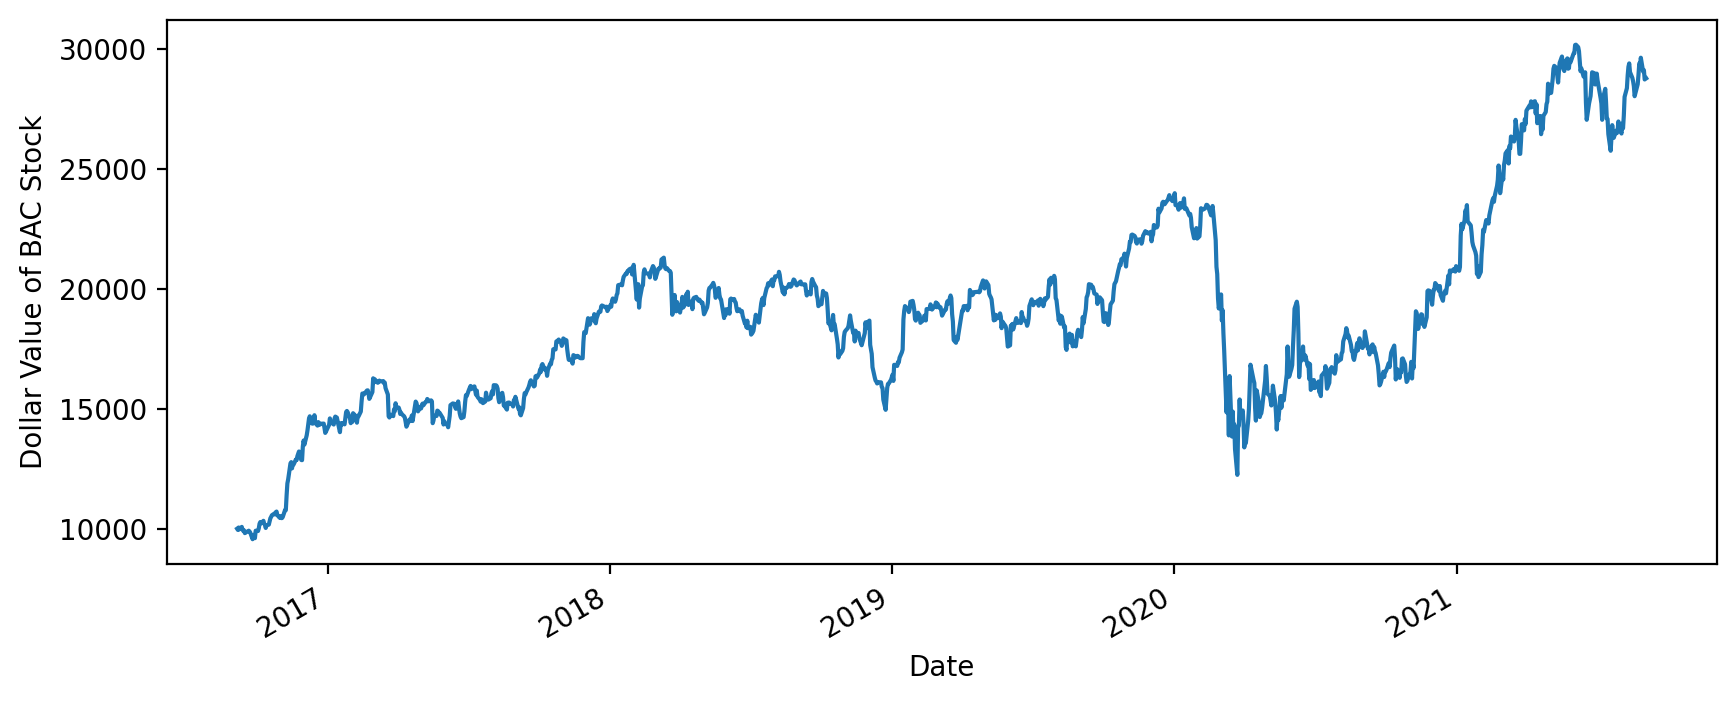

In [15]:
new_BAC = BAC['Adj Close']*701

plt.figure(figsize=(10, 4), dpi=200)
new_BAC.plot(ylabel="Dollar Value of BAC Stock")

**Annualized Sharpe Ratios for each stock in the portfolio**

In [17]:
def compute_sharpe_ratio(data, risk_free_rate = 0):
    mean_return = data["Adj Close"].pct_change(1).mean()
    std = data["Adj Close"].pct_change(1).std()
    sharpe_ratio = (mean_return-risk_free_rate) / std
    return sharpe_ratio * (252**0.5)

In [18]:
for keys, value in portfolio_dict.items():
    print(f"{keys} Annualized Sharpe Ratio is: {compute_sharpe_ratio(value)}")

BAC Annualized Sharpe Ratio is: 0.7947267104783096
JPM Annualized Sharpe Ratio is: 0.8165069200136568
C Annualized Sharpe Ratio is: 0.47918276513516356
HSBC Annualized Sharpe Ratio is: 0.03389350547471227
RY Annualized Sharpe Ratio is: 0.7323176596668234


**A plot showing the daily volume of stock traded over the time period of 5 years**

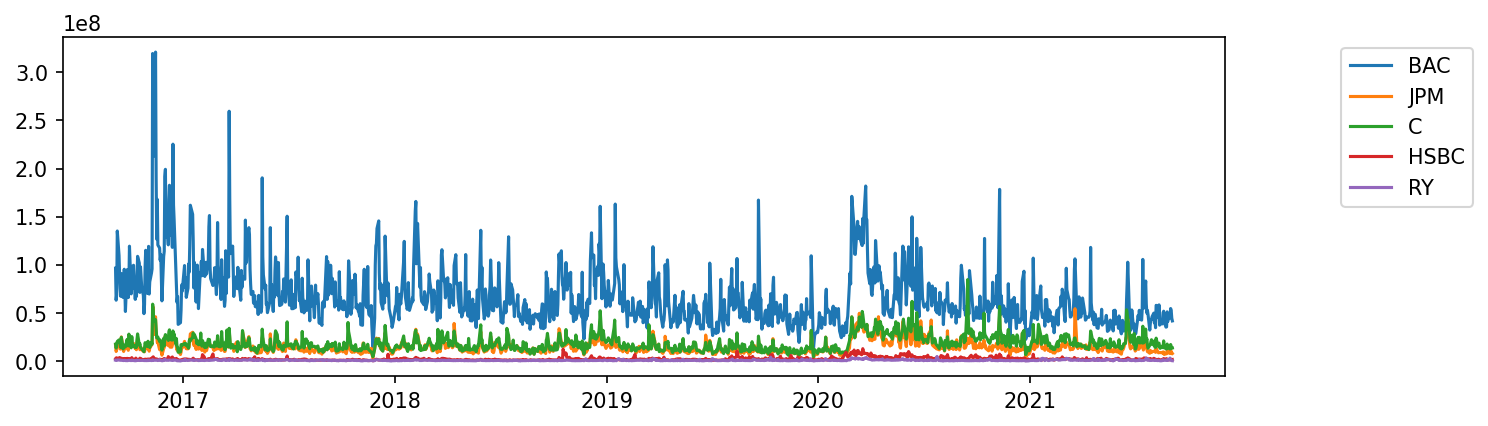

In [19]:
fig, ax = plt.subplots(figsize=(10,3), dpi=150)
ax.plot(BAC['Volume'], label='BAC')
ax.plot(JPM['Volume'], label='JPM')
ax.plot(C['Volume'], label='C')
ax.plot(HSBC['Volume'], label='HSBC')
ax.plot(RY['Volume'], label='RY')

ax.legend(loc=(1.1,0.5))

**A similar plot as the previous one, but it should reflect the total dollar amount, meaning we will need to take into account the price on each day the volume was traded**

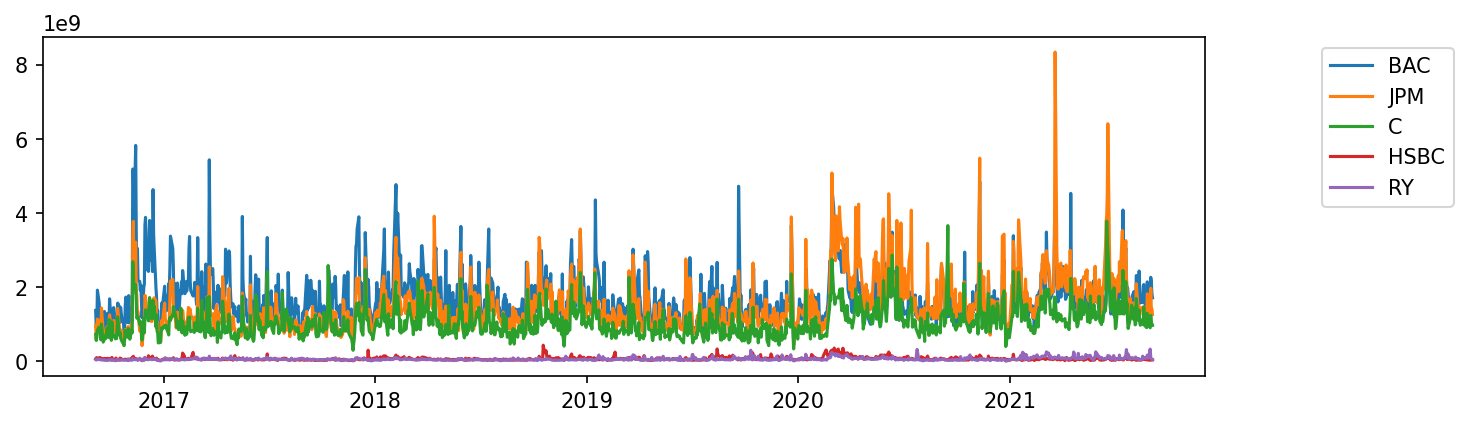

In [20]:
fig, ax = plt.subplots(figsize=(10,3), dpi=150)
ax.plot(BAC['Volume']*BAC['Adj Close'], label='BAC')
ax.plot(JPM['Volume']*JPM['Adj Close'], label='JPM')
ax.plot(C['Volume']*C['Adj Close'], label='C')
ax.plot(HSBC['Volume']*HSBC['Adj Close'], label='HSBC')
ax.plot(RY['Volume']*RY['Adj Close'], label='RY')

ax.legend(loc=(1.1,0.5))

In [22]:
# Based on the plot above, the stock that had the highest dollar value amount traded of their stock on a single day 
# and what date was this
(JPM['Volume']*JPM['Adj Close']).max()

8345011203.784801

In [23]:
(JPM['Volume']*JPM['Adj Close']).idxmax()

Timestamp('2021-03-19 00:00:00')

**The plot belows shows the Adj. Close Price along with the 60 day moving average of the price on the same plot**

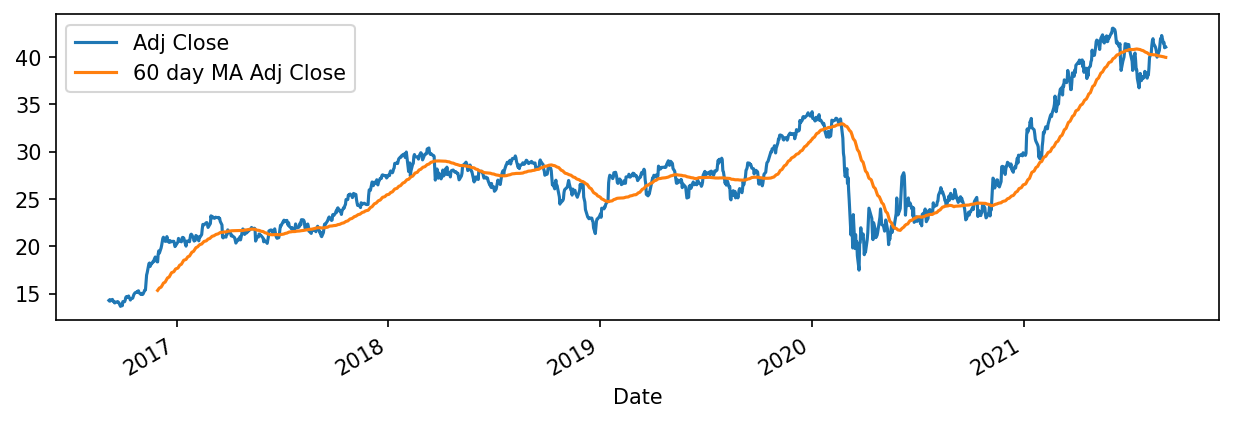

In [24]:
plt.figure(figsize=(10, 3), dpi=150)
BAC['Adj Close'].plot(label='Adj Close')
BAC['Adj Close'].rolling(window = 60).mean().plot(label='60 day MA Adj Close')
plt.legend()